In [2]:
import numpy as np
import pandas as pd
import math

In [3]:
df = pd.read_csv('features.csv', encoding='latin-1')
df

,Ano,Presidente,Partido_Pres,Min_Educacao,Partido_Min,Pop_Total,Desemprego,TFEB_Total,TFEB_0_3,TFEB_4_5,...,IPDPE_5_8_Series,IPDPE_EM,IPDPE_ES,IPDPE_Prop_ES_Sobre_EB,TRE_TA_EF,TRE_TA_EM,TRE_TR_EF,TRE_TR_EM,TRE_TA_EF.1,TRE_TA_EM.1
0,2000,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,2367.0,2274.0,25845.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,2579.0,2557.0,25539.0,10.5,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,2484.0,1723.0,23653.0,9.8,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,Fernando Henrique Cardoso,PSDB,Cristovam Buarque,PT,NaN,NaN,NaN,NaN,NaN,...,2395.0,1911.0,20669.0,8.6,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,Luiz InÃ¡cio Lula da Silva,PT,Tarso Genro,PT,NaN,NaN,31.7,13.4,61.5,...,2670.0,1745.0,19567.0,7.6,78.7,73.3,13.0,10.4,8.3,16.0
5,2005,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,31.2,13.0,62.8,...,2880.0,1850.0,21083.0,7.7,79.5,73.2,13.0,11.5,7.5,15.3
6,2006,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,31.2,15.4,67.5,...,3785.0,2571.0,21826.0,6.6,NaN,NaN,NaN,NaN,NaN,NaN
7,2007,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,30.7,17.0,70.0,...,4301.0,3119.0,23062.0,5.9,83.1,74.1,12.1,12.7,4.8,13.2
8,2008,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,30.2,18.1,72.7,...,5007.0,3609.0,21317.0,4.8,83.8,74.9,11.8,12.3,4.4,12.8
9,2009,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,29.8,18.4,74.8,...,5530.0,3805.0,23941.0,4.9,85.2,75.9,11.1,12.6,3.7,11.5


In [4]:
df['TDsp'] = (df['Desemprego']/df['Pop_Total']) * 100
df = df.drop(columns=['Desemprego', 'Pop_Total'])
df

,Ano,Presidente,Partido_Pres,Min_Educacao,Partido_Min,TFEB_Total,TFEB_0_3,TFEB_4_5,TFEB_6_10,TFEB_11_14,...,IPDPE_EM,IPDPE_ES,IPDPE_Prop_ES_Sobre_EB,TRE_TA_EF,TRE_TA_EM,TRE_TR_EF,TRE_TR_EM,TRE_TA_EF.1,TRE_TA_EM.1,TDsp
0,2000,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,2274.0,25845.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,2557.0,25539.0,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,1723.0,23653.0,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,Fernando Henrique Cardoso,PSDB,Cristovam Buarque,PT,NaN,NaN,NaN,NaN,NaN,...,1911.0,20669.0,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,Luiz InÃ¡cio Lula da Silva,PT,Tarso Genro,PT,31.7,13.4,61.5,95.9,96.4,...,1745.0,19567.0,7.6,78.7,73.3,13.0,10.4,8.3,16.0,NaN
5,2005,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,31.2,13.0,62.8,96.4,96.7,...,1850.0,21083.0,7.7,79.5,73.2,13.0,11.5,7.5,15.3,NaN
6,2006,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,31.2,15.4,67.5,96.9,96.9,...,2571.0,21826.0,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2007,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,30.7,17.0,70.0,97.0,97.0,...,3119.0,23062.0,5.9,83.1,74.1,12.1,12.7,4.8,13.2,NaN
8,2008,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,30.2,18.1,72.7,97.6,97.3,...,3609.0,21317.0,4.8,83.8,74.9,11.8,12.3,4.4,12.8,NaN
9,2009,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,29.8,18.4,74.8,97.7,97.5,...,3805.0,23941.0,4.9,85.2,75.9,11.1,12.6,3.7,11.5,NaN


In [5]:
print(df.columns[5:14])
print(df.columns[14:35])
print(df.columns[35:])

Index(['TFEB_Total', 'TFEB_0_3', 'TFEB_4_5', 'TFEB_6_10', 'TFEB_11_14',
       'TFEB_6_14', 'TFEB_15_17', 'TFEB_18_24', 'TFEB_25_Mais'],
      dtype='object')
Index(['NI25M_Sem', 'NI25M_En_Fun_In', 'NI25M_En_Fun_Com', 'NI25M_En_Med_In',
       'NI25M_En_Med_Com', 'NI25M_En_Sup_In ', 'NI25M_En_Sup_Com', 'TA15M_Ger',
       'TA15M_Urb', 'TA15M_Rur', 'TA15M_H', 'TA15M_M', 'TA15M_Bra',
       'TA15M_Pre_Par', 'TA15M_GI_15_19', 'TA15M_GI_20_24', 'TA15M_GI_25_34',
       'TA15M_GI_35_44', 'TA15M_GI_45_54', 'TA15M_GI_55_64', 'TA15M_GI_65_M'],
      dtype='object')
Index(['IPDPE_TodosNiveis', 'IPDPE_EB', 'IPDPE_EI', 'IPDPE_1_4_Serie',
       'IPDPE_5_8_Series', 'IPDPE_EM', 'IPDPE_ES', 'IPDPE_Prop_ES_Sobre_EB',
       'TRE_TA_EF', 'TRE_TA_EM', 'TRE_TR_EF', 'TRE_TR_EM', 'TRE_TA_EF.1',
       'TRE_TA_EM.1', 'TDsp'],
      dtype='object')


In [25]:
# Pesos por dado pro cálculo da métrica
IPDPE = 0.005
TRE = 1
w = {
    'TDsp': 10,
    'TFEB_Total': 1,
    'TFEB_0_3': 1,
    'TFEB_4_5': 1,
    'TFEB_6_10': 1,
    'TFEB_11_14': 1,
    'TFEB_6_14': 1,
    'TFEB_15_17': 1,
    'TFEB_18_24': 1,
    'TFEB_25_Mais': 1,
    'NI25M_Sem': 1,
    'NI25M_En_Fun_In': 1,
    'NI25M_En_Fun_Com': 1,
    'NI25M_En_Med_In': 1,
    'NI25M_En_Med_Com': 1,
    'NI25M_En_Sup_In ': 1,
    'NI25M_En_Sup_Com': 1,
    'TA15M_Ger': 1,
    'TA15M_Urb': 1,
    'TA15M_Rur': 1,
    'TA15M_H': 1,
    'TA15M_M': 1,
    'TA15M_Bra': 1,
    'TA15M_Pre_Par': 1,
    'TA15M_GI_15_19': 1,
    'TA15M_GI_20_24': 1,
    'TA15M_GI_25_34': 1,
    'TA15M_GI_35_44': 1,
    'TA15M_GI_45_54': 1,
    'TA15M_GI_55_64': 1,
    'TA15M_GI_65_M': 1,
    'IPDPE_TodosNiveis': IPDPE,
    'IPDPE_EB': IPDPE,
    'IPDPE_EI': IPDPE,
    'IPDPE_1_4_Serie': IPDPE,
    'IPDPE_5_8_Series': IPDPE,
    'IPDPE_EM': IPDPE,
    'IPDPE_ES': IPDPE,
    'IPDPE_Prop_ES_Sobre_EB': IPDPE,
    'TRE_TA_EF': TRE,
    'TRE_TA_EM': TRE,
    'TRE_TR_EF': TRE,
    'TRE_TR_EM': TRE,
    'TRE_TA_EF.1': TRE,
    'TRE_TA_EM.1': TRE,
}

In [26]:
means = df.mean(axis = 0, skipna = True)
means

Ano                        2010.000000
TFEB_Total                   29.314286
TFEB_0_3                     21.485714
TFEB_4_5                     75.909524
TFEB_6_10                    97.800000
TFEB_11_14                   97.709524
TFEB_6_14                    97.742857
TFEB_15_17                   84.371429
TFEB_18_24                   31.285714
TFEB_25_Mais                  4.895238
NI25M_Sem                     7.685714
NI25M_En_Fun_In              34.042857
NI25M_En_Fun_Com              8.985714
NI25M_En_Med_In               3.995238
NI25M_En_Med_Com             26.395238
NI25M_En_Sup_In               3.438095
NI25M_En_Sup_Com             15.376190
TA15M_Ger                     9.280952
TA15M_Urb                     6.985714
TA15M_Rur                    21.938095
TA15M_H                       9.509524
TA15M_M                       9.052381
TA15M_Bra                     5.652381
TA15M_Pre_Par                12.823810
TA15M_GI_15_19                1.480952
TA15M_GI_20_24           

In [27]:
from itertools import zip_longest

# Código 100% original, confia
# (brinks, https://codereview.stackexchange.com/questions/172113/best-way-to-get-nearest-non-zero-value-from-list)
def nearest_non_zero(lst, idx):
    if lst[idx] > 0:
        return lst[idx]
    before, after = lst[:idx], lst[idx+1:]
    for b_val, a_val in zip_longest(reversed(before), after, fillvalue=0):
        # N.B. I applied `reversed` inside `zip_longest` here. This
        # ensures that `before` and `after` are the same type, and that
        # `before + [lst[idx]] + after == lst`.
        if b_val > 0:
            return b_val
        if a_val > 0:
            return a_val
    else:
        return 0  # all zeroes in this list

In [37]:
# Procura valor não-nulo mais próximo
nearest_non_zero(df['TFEB_Total'], 0)
# Substitui valor nulo por não-nulo mais próximo
for column in df:
    dfObj = df[column]
    line = dfObj.values
    if not isinstance(line[0], str):
        for i in range(line.size):
            if math.isnan(line[i]):
                line[i] = nearest_non_zero(line, i)

In [29]:
df

,Ano,Presidente,Partido_Pres,Min_Educacao,Partido_Min,TFEB_Total,TFEB_0_3,TFEB_4_5,TFEB_6_10,TFEB_11_14,...,IPDPE_EM,IPDPE_ES,IPDPE_Prop_ES_Sobre_EB,TRE_TA_EF,TRE_TA_EM,TRE_TR_EF,TRE_TR_EM,TRE_TA_EF.1,TRE_TA_EM.1,TDsp
0,2000,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,31.7,13.4,61.5,95.9,96.4,...,2274.0,25845.0,11.0,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
1,2001,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,31.7,13.4,61.5,95.9,96.4,...,2557.0,25539.0,10.5,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
2,2002,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,31.7,13.4,61.5,95.9,96.4,...,1723.0,23653.0,9.8,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
3,2003,Fernando Henrique Cardoso,PSDB,Cristovam Buarque,PT,31.7,13.4,61.5,95.9,96.4,...,1911.0,20669.0,8.6,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
4,2004,Luiz InÃ¡cio Lula da Silva,PT,Tarso Genro,PT,31.7,13.4,61.5,95.9,96.4,...,1745.0,19567.0,7.6,78.7,73.3,13.0,10.4,8.3,16.0,3.332829
5,2005,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,31.2,13.0,62.8,96.4,96.7,...,1850.0,21083.0,7.7,79.5,73.2,13.0,11.5,7.5,15.3,3.332829
6,2006,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,31.2,15.4,67.5,96.9,96.9,...,2571.0,21826.0,6.6,79.5,73.2,13.0,11.5,7.5,15.3,3.332829
7,2007,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,30.7,17.0,70.0,97.0,97.0,...,3119.0,23062.0,5.9,83.1,74.1,12.1,12.7,4.8,13.2,3.332829
8,2008,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,30.2,18.1,72.7,97.6,97.3,...,3609.0,21317.0,4.8,83.8,74.9,11.8,12.3,4.4,12.8,3.332829
9,2009,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,29.8,18.4,74.8,97.7,97.5,...,3805.0,23941.0,4.9,85.2,75.9,11.1,12.6,3.7,11.5,3.332829


In [30]:
def score(line):
    score = 0
    # Não usa as linhas iniciais pro cálculo (não quantitativas)
    for column, val in zip(line.index, line):
        if not isinstance(val, str):
            # Se não tem valor, atribui a média
            if math.isnan(val):
                val = means[column]
            w_val = w[column] * val
            score += w_val
#             print(f'{column}: w_val: {w_val:.2f}, score: {score:.2f}')
    return score

In [31]:
score_governanca = []
score_insercao_pop = []
score_cap_educacional = []

for i in range(len(df)):
    line = df.iloc[i]
    
    insercao_pop = line[5:14]
    cap_educacional = line[14:35]
    governanca = line[35:]
    
    score_governanca.append(score(governanca))
    score_insercao_pop.append(score(insercao_pop))
    score_cap_educacional.append(score(cap_educacional))
    
    print(f'Governança: {score(governanca):.2f}, Inserção Pop.: {score(insercao_pop):.2f}, \
Cap. Educacional: {score(cap_educacional):.2f}')

Governança: 437.61, Inserção Pop.: 514.60, Cap. Educacional: 286.90
Governança: 437.72, Inserção Pop.: 514.60, Cap. Educacional: 286.90
Governança: 424.50, Inserção Pop.: 514.60, Cap. Educacional: 286.90
Governança: 410.98, Inserção Pop.: 514.60, Cap. Educacional: 286.90
Governança: 409.72, Inserção Pop.: 514.60, Cap. Educacional: 286.90
Governança: 420.91, Inserção Pop.: 515.50, Cap. Educacional: 280.30
Governança: 441.89, Inserção Pop.: 524.20, Cap. Educacional: 269.50
Governança: 465.55, Inserção Pop.: 527.10, Cap. Educacional: 262.60
Governança: 472.95, Inserção Pop.: 533.20, Cap. Educacional: 259.20
Governança: 497.35, Inserção Pop.: 536.40, Cap. Educacional: 254.10
Governança: 528.47, Inserção Pop.: 536.40, Cap. Educacional: 254.10
Governança: 554.28, Inserção Pop.: 538.50, Cap. Educacional: 236.40
Governança: 559.09, Inserção Pop.: 539.50, Cap. Educacional: 236.40
Governança: 584.69, Inserção Pop.: 546.20, Cap. Educacional: 233.20
Governança: 584.29, Inserção Pop.: 548.30, Cap. 

(21,)
21


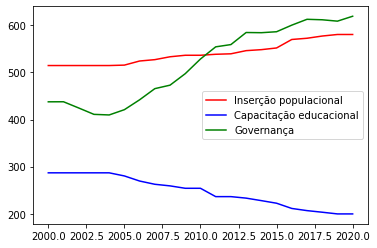

In [32]:
import matplotlib.pyplot as plt
t = np.arange(2000, 2021, 1)
print(t.shape)
print(len(score_insercao_pop))

fig, ax = plt.subplots()

ax.plot(t, score_insercao_pop, 'r', label='Inserção populacional')
ax.plot(t, score_cap_educacional, 'b', label='Capacitação educacional')
ax.plot(t, score_governanca, 'g', label='Governança')

legend = ax.legend(loc='best', shadow=False)

plt.show()

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def linear_reg(X, y_pred):
    model = LinearRegression().fit(X, y_pred)
    a = model.coef_[0]
    b = model.intercept_
    return (a, b, model)

# TODO: ver se esse é o melhor jeito (ou jeito certo) de fazer reg. polinomial
def pol_reg(X, y_pred, degree):
    reg = PolynomialFeatures(degree)
    X_poly = reg.fit_transform(X)
    a, b, model = linear_reg(X_poly, y_pred)
    return (a, b, X_poly, model)

In [100]:
def plot_reg(score, label, degree=None):
    fig, ax = plt.subplots()

    ax.plot(t, score, 'r', label=label)
    x = np.arange(2000, 2030, 1)
    X_pred = np.linspace((1,2000), (21,2020), 21)
    if degree:
        a, b, X_poly, model = pol_reg(X_pred, score, degree)
        # ax.plot(X_poly, a*X_poly + b, 'g--', label='Regressão polinomial')
        # TODO: investigar por que precisa selecionar a coluna de X_poly e por que o
        # gráfico não funciona
        ax.plot(X_poly[:,3], model.predict(X_poly), 'g--', label='Regressão polinomial')
    else:
        a, b, model = linear_reg(X_pred, score)
        ax.plot(x, a*x + b, 'g--', label='Regressão linear')
        # TODO: testar se o predict funciona igual a linha anterior
        # ax.plot(x, model.predict(x), 'g--', label='Regressão linear')

    legend = ax.legend(loc='best', shadow=False)

    plt.show()

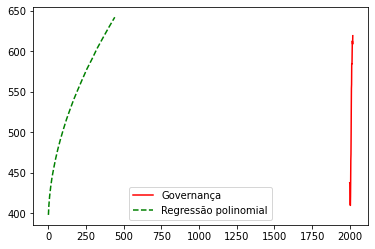

In [99]:
plot_reg(score_governanca, 'Governança', 2)

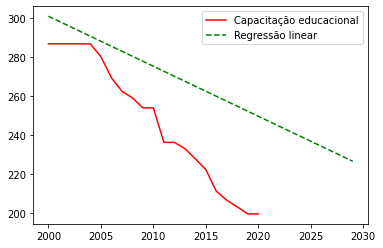

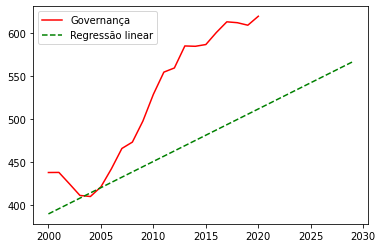

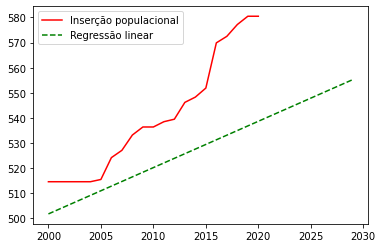

In [35]:
plot_reg(score_cap_educacional, 'Capacitação educacional')
plot_reg(score_governanca, 'Governança')
plot_reg(score_insercao_pop, 'Inserção populacional')